In [ ]:
import pandas as pd

In [ ]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Cargar el dataset de noticias digitales desde el archivo True.csv
df_true = pd.read_csv("True.csv")
print(df_true.shape)
df_true.head()

(21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
# Cargar el dataset de noticias digitales desde el archivo Fake.csv
df_fake = pd.read_csv("Fake.csv")
print(df_fake.shape)
df_fake.head()

(23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
# Descar# Descarga los recursos necesarios para el preprocesamiento de texto en NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Preprocesamiento de texto: tokenización y eliminación de stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return " ".join(filtered_tokens)

In [ ]:
#insert label column
df_true['label'] = 1
df_fake['label'] = 0

[Text(0, 0, 'politicsNews'), Text(1, 0, 'worldnews')]

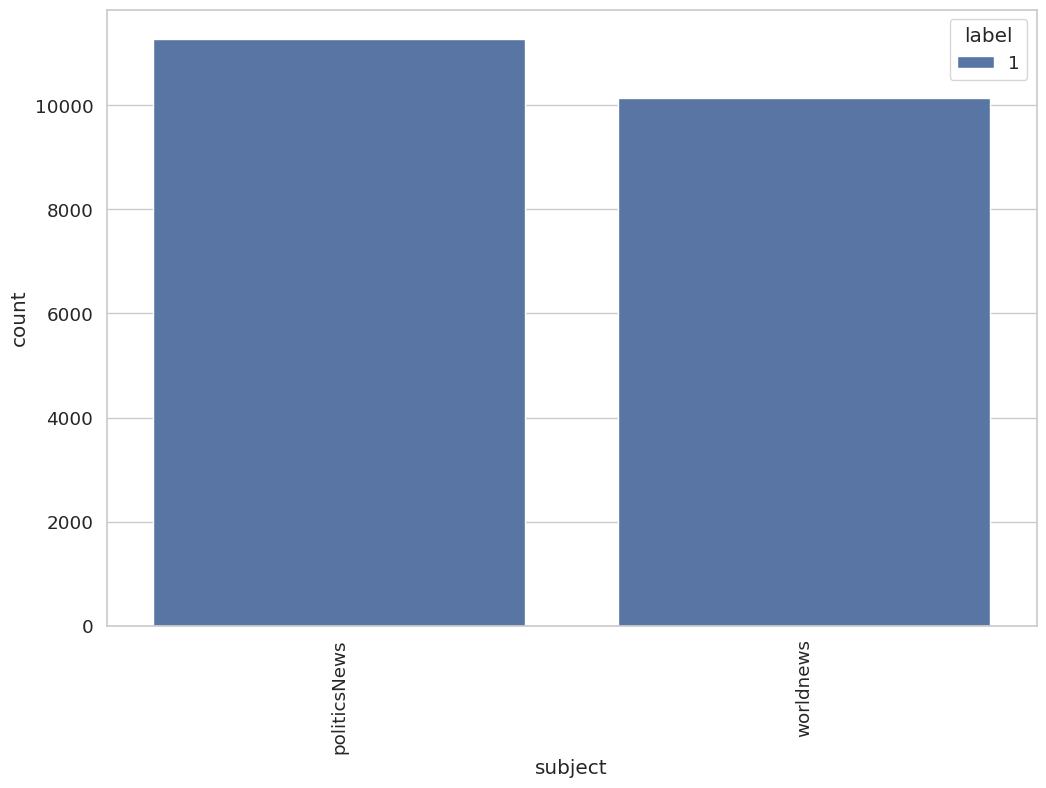

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "label" , data = df_true)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

[Text(0, 0, 'News'),
 Text(1, 0, 'politics'),
 Text(2, 0, 'Government News'),
 Text(3, 0, 'left-news'),
 Text(4, 0, 'US_News'),
 Text(5, 0, 'Middle-east')]

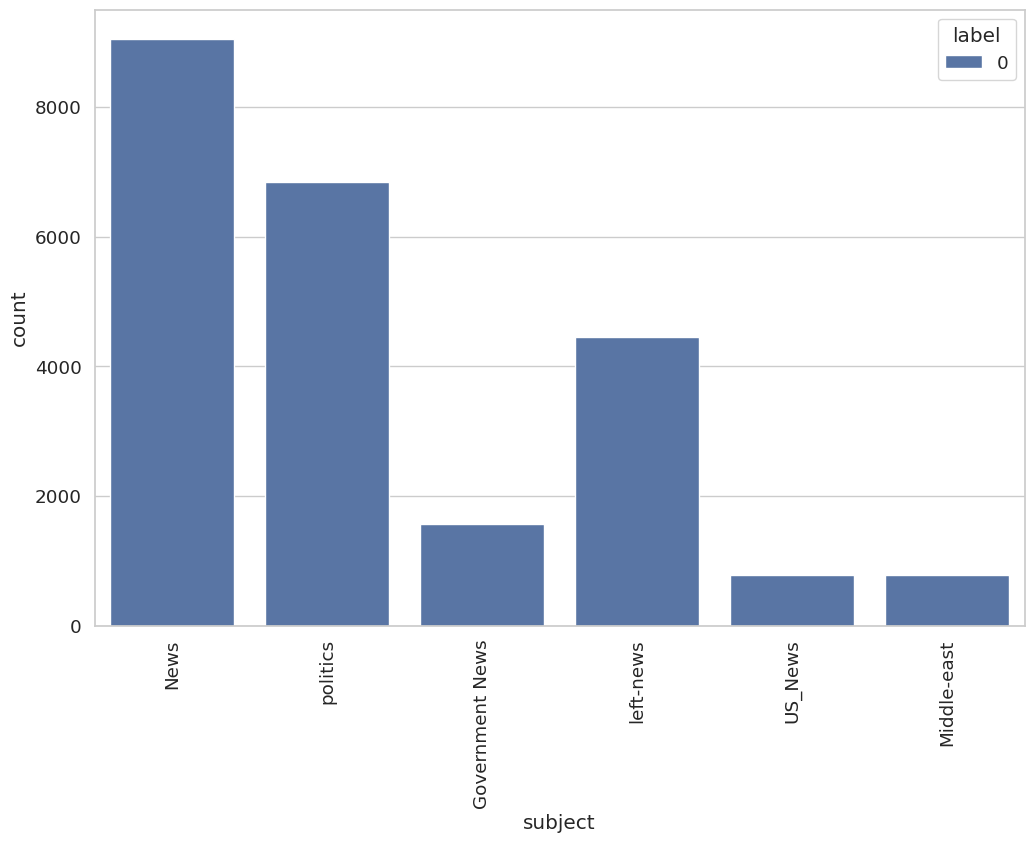

In [ ]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "label" , data = df_fake)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [ ]:
# df_fake['clean_text_title'] = df_fake['title'].apply(preprocess_text)

In [ ]:
# df_true['clean_text_title'] = df_true['title'].apply(preprocess_text)

In [ ]:
nlp = spacy.load("en_core_web_lg")

In [ ]:
import spacy
import matplotlib.pyplot as plt
from spacy.cli import download

# Descargar el modelo
download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
#transform title column from true news dataset to vectors
df_true['vector'] = df_true['title'].apply(lambda text:nlp(text).vector)
df_true.head()

,title,text,subject,date,label,vector
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"[-2.0529835, -0.569027, -3.1433282, 0.55970275..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,"[-1.4419098, 2.333012, -2.0302525, 2.1737072, ..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,"[0.557869, 2.2574153, 0.1913623, -0.041898414,..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,"[-1.4035959, 0.07810003, -0.17810063, 2.512658..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,"[0.010546171, 1.6784946, -0.5903046, 0.4184245..."


In [ ]:
#transform title column from fake news dataset to vectors
df_fake['vector'] = df_fake['title'].apply(lambda text:nlp(text).vector)
df_fake.head()

,title,text,subject,date,label,vector
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,"[0.82458675, -0.24166599, -0.066156715, 0.9113..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,"[-0.106700815, -0.5254911, -0.10211553, 1.7716..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,"[-0.005741093, -0.27893615, 2.1448169, -1.4584..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,"[0.7094183, 0.55141747, 0.17757612, -0.1253749..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,"[-0.74229336, -0.1589058, -0.97260255, 0.13083..."


In [ ]:
import pickle
import tensorflow as tf

from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df = pd.concat([df_true, df_fake])
df.head()

,title,text,subject,date,label,vector
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"[-2.0529835, -0.569027, -3.1433282, 0.55970275..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,"[-1.4419098, 2.333012, -2.0302525, 2.1737072, ..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,"[0.557869, 2.2574153, 0.1913623, -0.041898414,..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,"[-1.4035959, 0.07810003, -0.17810063, 2.512658..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,"[0.010546171, 1.6784946, -0.5903046, 0.4184245..."


In [ ]:
df = df.drop(["subject", "date"], axis="columns")
df.head()

,title,text,label,vector
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"[-2.0529835, -0.569027, -3.1433282, 0.55970275..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,"[-1.4419098, 2.333012, -2.0302525, 2.1737072, ..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,"[0.557869, 2.2574153, 0.1913623, -0.041898414,..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,"[-1.4035959, 0.07810003, -0.17810063, 2.512658..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,"[0.010546171, 1.6784946, -0.5903046, 0.4184245..."


<Axes: xlabel='label', ylabel='count'>

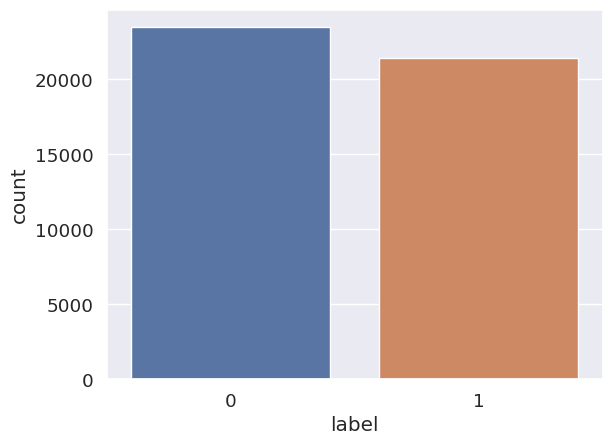

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(df , x = 'label')

In [ ]:
#concatenate fake and true dataset
concatenated_df = pd.concat([df_true[['vector','label']], df_fake[['vector','label']]], ignore_index=True)
print(concatenated_df.shape)
concatenated_df.head()

(44898, 2)


,vector,label
0,"[-2.0529835, -0.569027, -3.1433282, 0.55970275...",1
1,"[-1.4419098, 2.333012, -2.0302525, 2.1737072, ...",1
2,"[0.557869, 2.2574153, 0.1913623, -0.041898414,...",1
3,"[-1.4035959, 0.07810003, -0.17810063, 2.512658...",1
4,"[0.010546171, 1.6784946, -0.5903046, 0.4184245...",1


In [ ]:
import numpy as np

In [ ]:
#split the dataset to test and train part
X_train, X_test, y_train, y_test = train_test_split(concatenated_df['vector'], concatenated_df['label'], test_size=0.3
                                                    ,random_state=44)

X_train = np.stack(X_train)
X_test = np.stack(X_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((31428, 300), (31428,), (13470, 300), (13470,))

In [ ]:
max_vocab = 10000
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#making pipeline and train model number one using MinMaxScaler and MultinomialNB
clf1 = make_pipeline(
    MinMaxScaler(),
    MultinomialNB()
)

clf1.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
print(classification_report(y_test, clf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7136
           1       0.98      0.97      0.98      6334

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



In [ ]:
#making pipeline and train model number one using MinMaxScaler and KNeighborsClassifier
clf2 = make_pipeline(
    MinMaxScaler(),
    KNeighborsClassifier(n_neighbors=5)
)

clf2.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
print(classification_report(y_test, clf2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7136
           1       1.00      0.99      0.99      6334

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [ ]:
def clasificar_texto(title_new):
    # Preprocesar el texto ingresado
    title_new_vector = nlp(title_new).vector
    title_new_vector

    # Realizar la clasificación
    prediccion = clf2.predict([title_new_vector])[0]

    # Determinar la etiqueta de clasificación
    if prediccion >= 0.5:
        etiqueta = 'Real'
    else:
        etiqueta = 'Falso'

    return etiqueta

In [ ]:
#title_new = "U.S. military to accept transgender recruits on Monday: Pentagon" # true
title_new = " Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing" # fake

In [ ]:
# Clasificar el texto
etiqueta_clasificacion = clasificar_texto(title_new)

# Imprimir el resultado de la clasificación
print("El texto ingresado es:", etiqueta_clasificacion)

El texto ingresado es: Falso


In [ ]:
#title_new = "U.S. military to accept transgender recruits on Monday: Pentagon" # true
title_1 = " Carlos va ser a hacer toma de local el dia jueves 20 en la UNAP" # fake

In [ ]:
# Clasificar el texto
etiqueta_clasificacion1 = clasificar_texto(title_1)

# Imprimir el resultado de la clasificación
print("El texto ingresado es:", etiqueta_clasificacion1 )

El texto ingresado es: Falso
